In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import openslide
from openslide import open_slide
from pathlib import Path
import pandas as pd
from PIL import Image, ImageOps
import seaborn as sns
import sys
#from skimage.morphology import skeletonize

#Allow Pillow to open very large images
Image.MAX_IMAGE_PIXELS = None

#Check if OpenCV is using optimised code
cv2.useOptimized()

True

In [21]:
# Import HEMnet package
BASE_DIR = Path().resolve().parent
HEMNET_DIR = BASE_DIR.joinpath('HEMnet')
sys.path.append(str(HEMNET_DIR))

from slide import *
from utils import *

In [9]:
ANNOTATIONS_PATH = Path('/QRISdata/Q1139/ST_Projects/HEMnet/Annotated_Jpegs')

In [10]:
annotated_imgs = []
for img in ANNOTATIONS_PATH.glob('*.jpg'):
    name = img.name
    annotated_imgs.append(name)
annotated_imgs.sort()
annotated_imgs

['carlosjosesuarez_crcoutlines_170824_green_Page_01.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_02.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_03.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_04.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_05.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_06.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_07.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_08.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_09.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_10.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_11.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_12.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_13.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_14.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_15.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_16.jpg',
 'carlosjosesuarez_crcoutlines_170824_green_Page_17.jpg',
 'carlosjosesu

In [65]:
def imshow(img_bgr):
    """Display colour OpenCV image with Pillow
    
    Parameters
    ----------
    img_bgr : OpenCV(bgr) image
    
    Returns
    -------
    img : Pillow(rgb) image
    """
    img_rgb = img_bgr[:, :, ::-1]    #Convert from BGR to RGB
    return Image.fromarray(img_rgb)

def imshow_gray(img_gray):
    return Image.fromarray(img_gray, 'L')

In [17]:
annotated_img_path = ANNOTATIONS_PATH.joinpath(annotated_imgs[6])
annotated_img = cv2.imread(str(annotated_img_path))

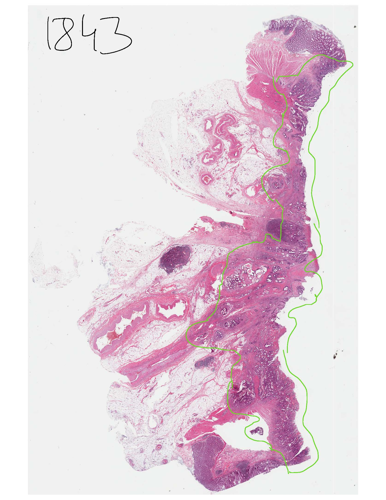

In [23]:
thumbnail(imshow(annotated_img), (500,500))

In [72]:
annotated_img_gray = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2GRAY)

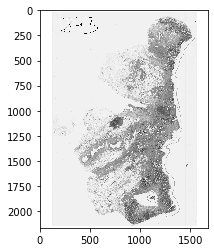

In [73]:
plt.imshow(annotated_img_gray, cmap = 'gray')

In [74]:
annotated_img_thresh = cv2.threshold(annotated_img_gray, 250, 255, cv2.THRESH_BINARY)[1]

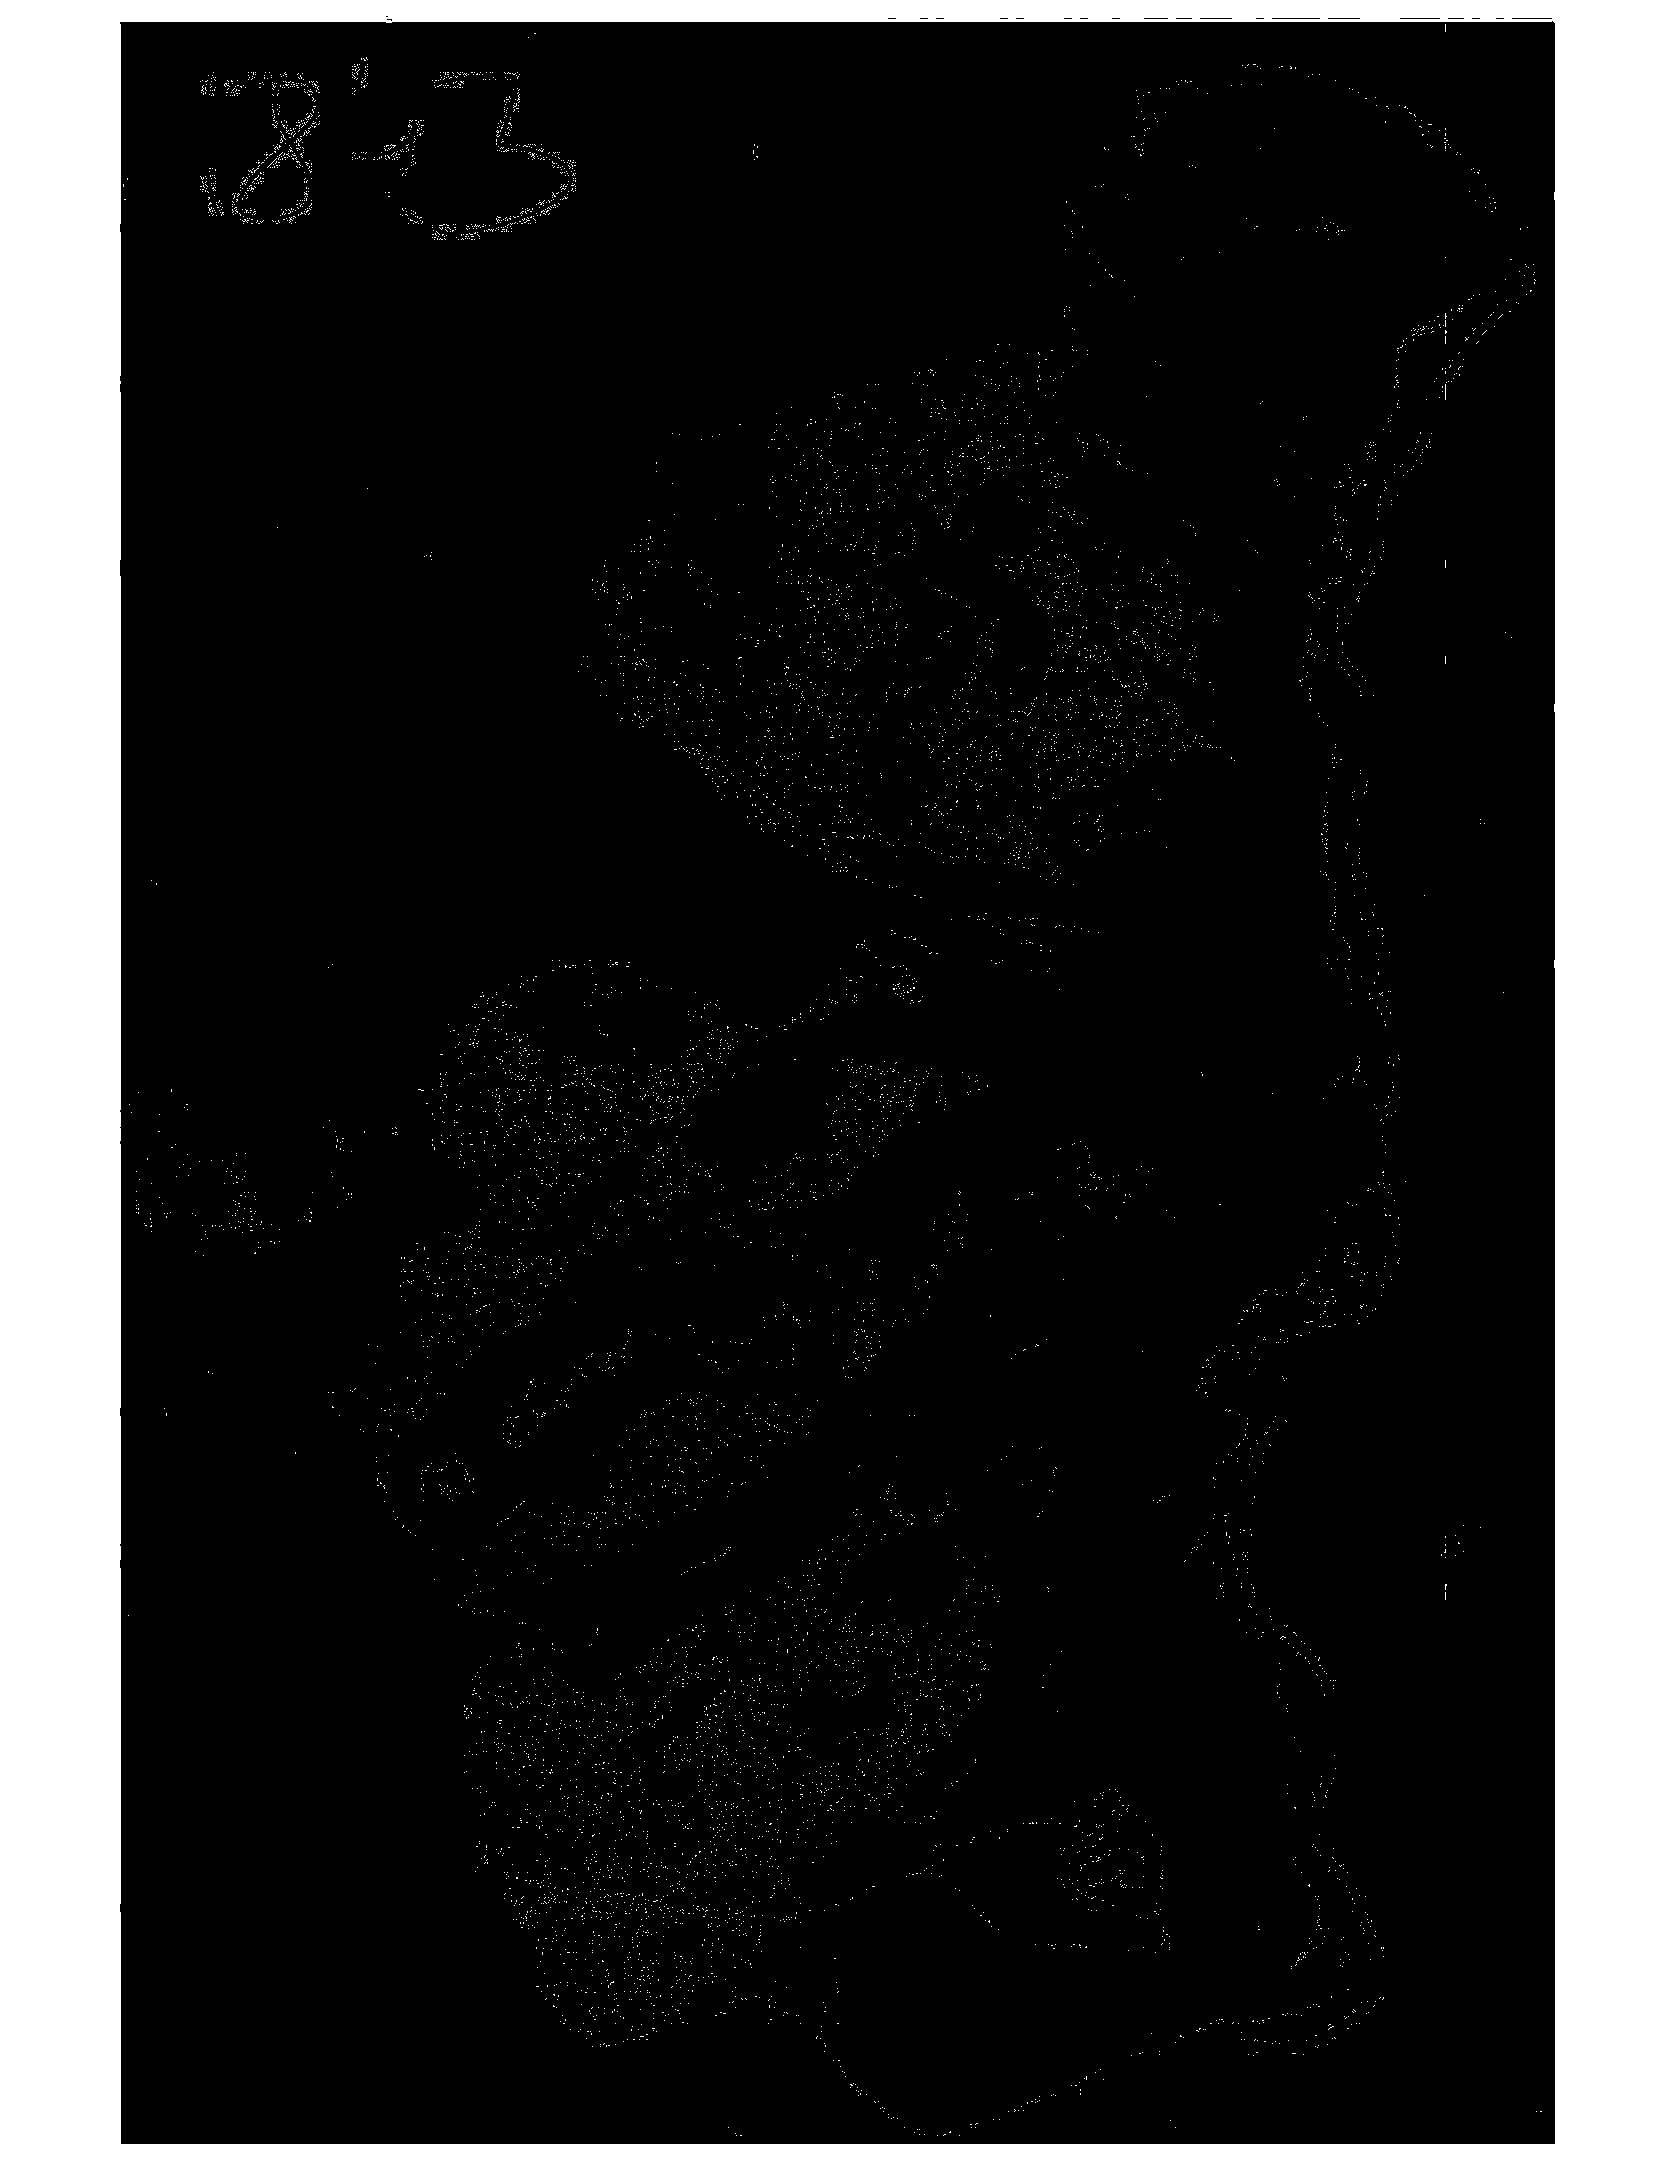

In [75]:
imshow_gray(annotated_img_thresh)

In [90]:
#detect corners
dst = cv2.cornerHarris(annotated_img_thresh, 10, 5, 1)
dst = cv2.dilate(dst, None)

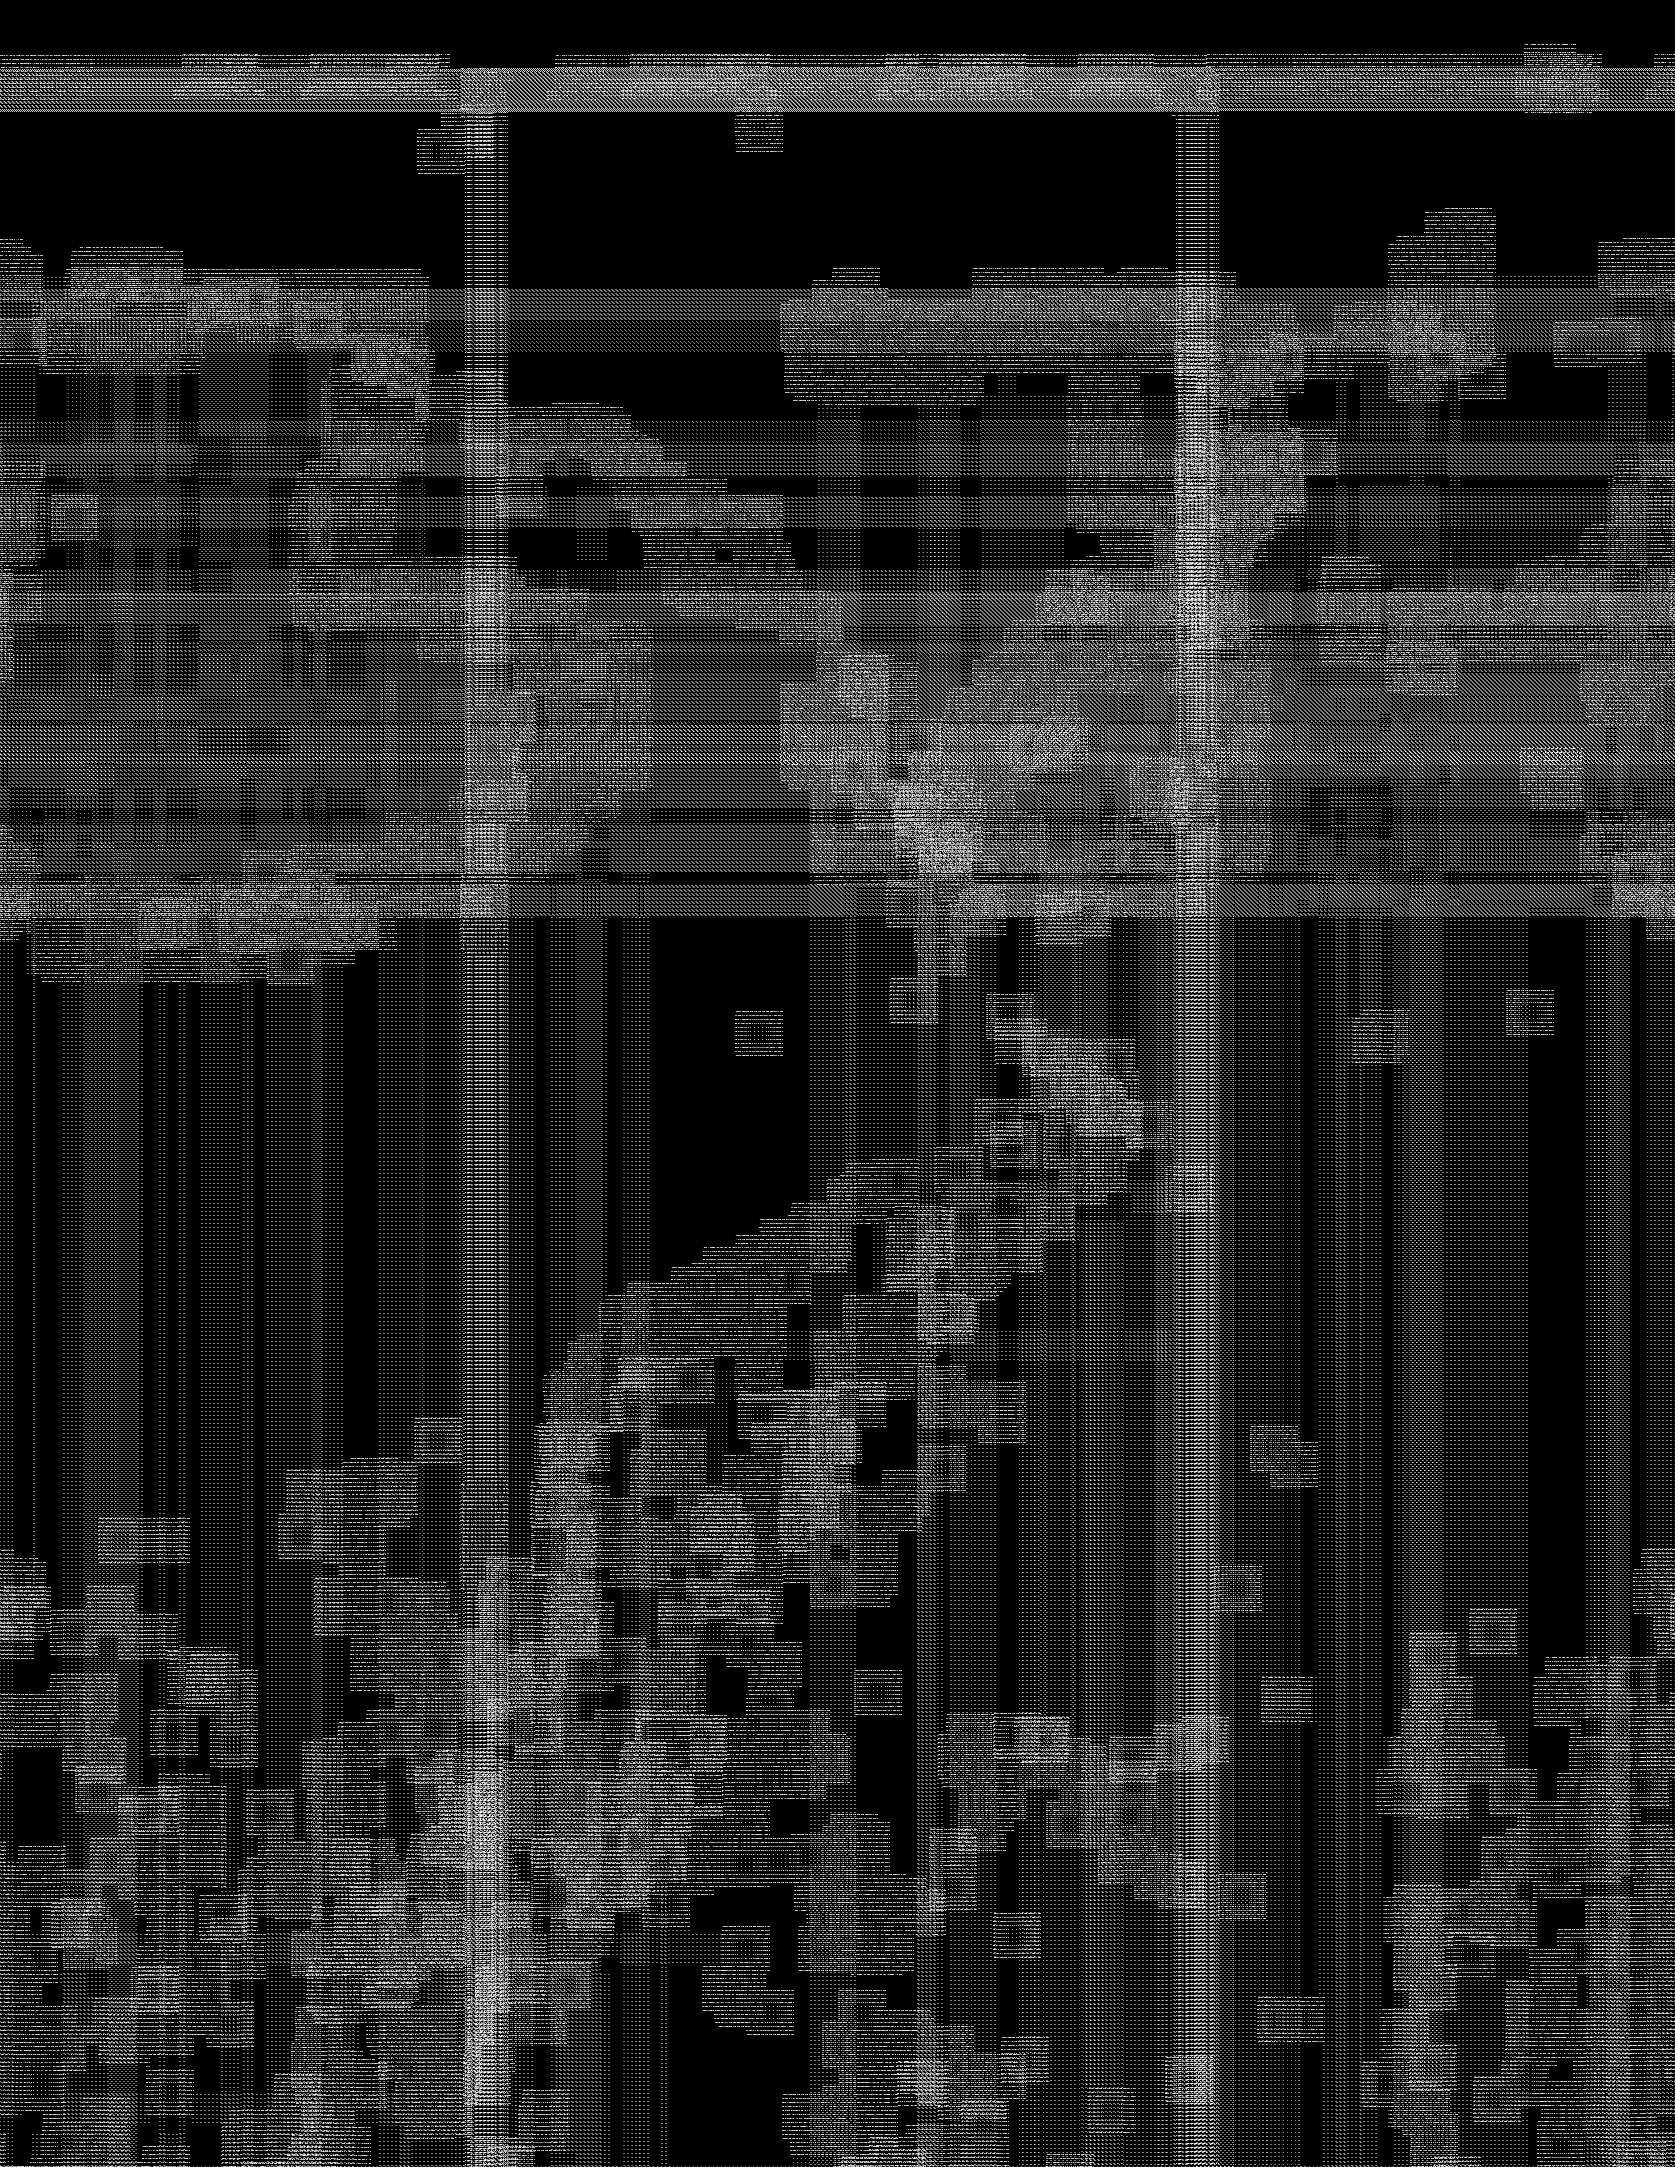

In [91]:

imshow_gray(dst)